#HeartBeat Sounds

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
#IMAGE PROCESS
from PIL import Image
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import IPython.display as ipd
import scipy
import tensorflow as tf
import wave

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os, fnmatch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
INPUT = "/content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds/"
MAX_SOUND_CLIP_DURATION=12   

## Data Exploratory Analysis

In [ ]:
set_a = pd.read_csv(INPUT + "set_a.csv" , delimiter=',')
set_b = pd.read_csv(INPUT + "set_b.csv" ,  delimiter=',')

In [ ]:
set_a.head(10)

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN
5       a  set_a/artifact__201105061143.wav  artifact       NaN
6       a  set_a/artifact__201105190800.wav  artifact       NaN
7       a  set_a/artifact__201105280851.wav  artifact       NaN
8       a  set_a/artifact__201106010559.wav  artifact       NaN
9       a  set_a/artifact__201106010602.wav  artifact       NaN

In [ ]:
set_a["dataset"].value_counts()

a    176
Name: dataset, dtype: int64

In [ ]:
(set_a.isnull() | set_a.empty).sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [ ]:
set_a["label"].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [ ]:
set_b.head(10)

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
5       b  set_b/Btraining_extrastole_140_1306519735121_D...  extrastole   
6       b  set_b/Btraining_extrastole_144_1306522408528_B...  extrastole   
7       b  set_b/Btraining_extrastole_144_1306522408528_B...  extrastole   
8       b  set_b/Btraining_extrastole_148_1306768801551_B...  extrastole   
9       b  set_b/Btraining_extrastole_151_1306779785624_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9      NaN

In [ ]:
set_b["dataset"].value_counts()

b    656
Name: dataset, dtype: int64

In [ ]:
(set_b.isnull() | set_b.empty).sum()

dataset       0
fname         0
label       195
sublabel    507
dtype: int64

In [ ]:
set_b["label"].value_counts()


normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

### Combine Datasets a & b

In [ ]:
training_data = pd.concat([set_a, set_b])

In [ ]:
training_data.head(10)

dataset                             fname     label sublabel
0       a  set_a/artifact__201012172012.wav  artifact      NaN
1       a  set_a/artifact__201105040918.wav  artifact      NaN
2       a  set_a/artifact__201105041959.wav  artifact      NaN
3       a  set_a/artifact__201105051017.wav  artifact      NaN
4       a  set_a/artifact__201105060108.wav  artifact      NaN
5       a  set_a/artifact__201105061143.wav  artifact      NaN
6       a  set_a/artifact__201105190800.wav  artifact      NaN
7       a  set_a/artifact__201105280851.wav  artifact      NaN
8       a  set_a/artifact__201106010559.wav  artifact      NaN
9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data["dataset"].value_counts()

b    656
a    176
Name: dataset, dtype: int64

In [ ]:
training_data.shape

(832, 4)

In [ ]:
training_data.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

### Split Test Data and Training Data

In [ ]:
test_data = training_data[training_data['label'].isnull()]

In [ ]:
test_data = test_data.reset_index()

In [ ]:
test_data.shape

(247, 5)

In [ ]:
test_data.head(10)

index dataset                     fname label sublabel
0    124       a  set_a/__201012172010.wav   NaN      NaN
1    125       a  set_a/__201101051105.wav   NaN      NaN
2    126       a  set_a/__201101061552.wav   NaN      NaN
3    127       a  set_a/__201101091156.wav   NaN      NaN
4    128       a  set_a/__201101110659.wav   NaN      NaN
5    129       a  set_a/__201101152256.wav   NaN      NaN
6    130       a  set_a/__201101220549.wav   NaN      NaN
7    131       a  set_a/__201101241434.wav   NaN      NaN
8    132       a  set_a/__201102081033.wav   NaN      NaN
9    133       a  set_a/__201102081045.wav   NaN      NaN

### Drop test data from training data

In [ ]:
training_data = training_data[training_data['label'].notna()]

In [ ]:
training_data.shape


(585, 4)

In [ ]:
training_data["dataset"].value_counts()

b    461
a    124
Name: dataset, dtype: int64

In [ ]:
training_data["label"].value_counts()


normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

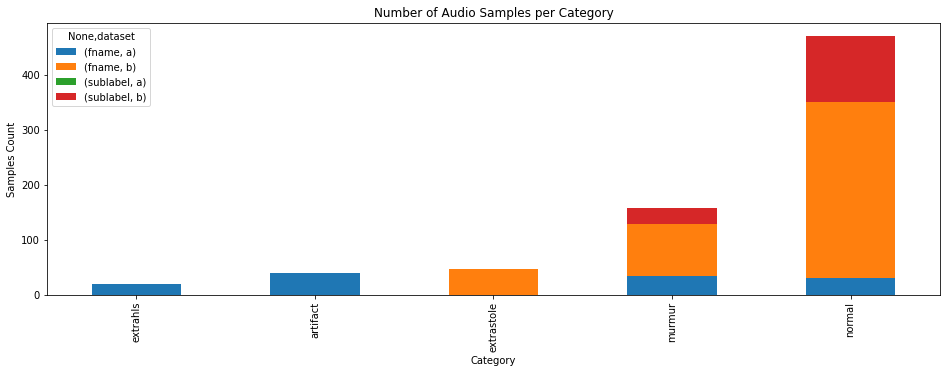

In [ ]:
# visualize data distribution by category
category_group = training_data.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

In [ ]:
training_data.isnull().sum()

dataset       0
fname         0
label         0
sublabel    436
dtype: int64

In [ ]:
training_data = training_data.reset_index()


In [ ]:
training_data.drop("index",axis="columns",inplace=True)

In [ ]:
training_data.head(10)

dataset                             fname     label sublabel
0       a  set_a/artifact__201012172012.wav  artifact      NaN
1       a  set_a/artifact__201105040918.wav  artifact      NaN
2       a  set_a/artifact__201105041959.wav  artifact      NaN
3       a  set_a/artifact__201105051017.wav  artifact      NaN
4       a  set_a/artifact__201105060108.wav  artifact      NaN
5       a  set_a/artifact__201105061143.wav  artifact      NaN
6       a  set_a/artifact__201105190800.wav  artifact      NaN
7       a  set_a/artifact__201105280851.wav  artifact      NaN
8       a  set_a/artifact__201106010559.wav  artifact      NaN
9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data.describe()

dataset                             fname   label     sublabel
count      585                               585     585          149
unique       2                               585       5            2
top          b  set_a/artifact__201012172012.wav  normal  noisynormal
freq       461                                 1     351          120

### EDA

In [ ]:
x=training_data.groupby("label")["label"].count().sort_values(ascending=False)
x

label
normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

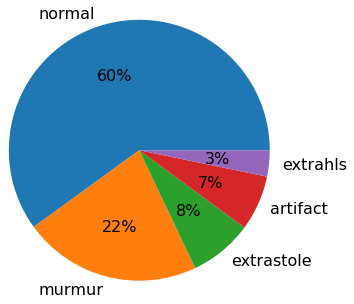

In [ ]:
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

### Timing


In [ ]:
set_a_timing = pd.read_csv("/content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds/set_a_timing.csv" ,  delimiter=',')
set_a_timing.head(10)

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992
5  set_a/normal__201102081321.wav      3    S2     73729
6  set_a/normal__201102081321.wav      4    S1     88761
7  set_a/normal__201102081321.wav      4    S2    101646
8  set_a/normal__201102081321.wav      5    S1    115246
9  set_a/normal__201102081321.wav      5    S2    127415

In [ ]:
set_a_timing.describe()

cycle       location
count  390.000000     390.000000
mean     5.733333  164639.984615
std      3.732807   99310.875752
min      1.000000    2583.000000
25%      3.000000   82313.000000
50%      5.000000  155624.500000
75%      8.000000  239709.750000
max     19.000000  390873.000000

In [ ]:
set_a_timing.isnull().sum()

fname       0
cycle       0
sound       0
location    0
dtype: int64

In [ ]:
set_a_timing["fname"].value_counts()

set_a/normal__201105011626.wav    38
set_a/normal__201105021804.wav    30
set_a/normal__201103090635.wav    26
set_a/normal__201102081321.wav    24
set_a/normal__201108011118.wav    24
set_a/normal__201106221450.wav    22
set_a/normal__201108011112.wav    18
set_a/normal__201108011115.wav    18
set_a/normal__201104141251.wav    18
set_a/normal__201103140132.wav    18
set_a/normal__201105151450.wav    18
set_a/normal__201102260502.wav    16
set_a/normal__201106141148.wav    16
set_a/normal__201106221418.wav    16
set_a/normal__201105021654.wav    14
set_a/normal__201108011114.wav    14
set_a/normal__201106210943.wav    14
set_a/normal__201103140822.wav    12
set_a/normal__201103151912.wav    12
set_a/normal__201106111136.wav    12
set_a/normal__201103221214.wav    10
Name: fname, dtype: int64

In [ ]:
set_a_timing["sound"].value_counts()

S1    195
S2    195
Name: sound, dtype: int64

In [ ]:
set_a_timing["cycle"].value_counts()

1     42
3     42
4     42
5     42
2     42
6     40
7     34
8     28
9     22
11    12
10    12
12    10
13     6
14     4
15     4
16     2
17     2
18     2
19     2
Name: cycle, dtype: int64

## Categories

### Analysis of different heart sound categories

####  Waveform

Sound is the pressure of air propagates to our ear. Digital audio file is gotten from a sound sensor that can detects sound waves and converting it to electrical signals.

Specifically, it's telling us about the wave's displacement, and how it changes over time.

In [ ]:
def sampleCategory(audio_file, type):
  # Load use Librosa
  y, sr = librosa.load(audio_file)   #default sampling rate is 22 HZ
  dur=librosa.get_duration(y)
  print ("duration:", dur)
  print(y.shape, sr)
  # librosa plot
  plt.figure(figsize=(16, 3))
  librosa.display.waveplot(y, sr=sr)
  plt.title(type)
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  return y, sr

#### Spectrum

A sound spectrum is a representation of a sound – usually a short sample of a sound – in terms of the amount of vibration at each individual frequency. 

In [ ]:
def spectrumAnalysis(sound_sample, sample_rate):
  fft_normal = np.fft.fft(sound_sample)
  magnitude_normal = np.abs(fft_normal)
  freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
  half_freq = freq_normal[:int(len(freq_normal)/2)]
  half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

  plt.figure(figsize=(12,8))
  plt.plot(half_freq,half_magnitude)
  plt.title("Spectrum")
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.show()

#### Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
For us, as human, we sense a sound not only on a particular time by its intensity, but also by its pitch. The pitch is the frequency of the sound - higher pitch corresponding to higher frequency and vice versa.

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

def spectogramAnalysis(sound_sample):
  # STFT -> spectrogram
  # calculate duration hop length and window in seconds
  hop_length_duration = float(hop_length)/sample_rate
  n_fft_duration = float(n_fft)/sample_rate

  print("STFT hop length duration is: {}s".format(hop_length_duration))
  print("STFT window duration is: {}s".format(n_fft_duration))

  # perform stft
  stft_normal = librosa.stft(sound_sample, n_fft=n_fft, hop_length=hop_length)

  # calculate abs values on complex numbers to get magnitude
  spectrogram = np.abs(stft_normal)
  log_spectrogram = librosa.amplitude_to_db(spectrogram)

  # display spectrogram
  plt.figure(figsize=(15,10))
  librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  #plt.set_cmap("YlOrBr")
  plt.title("Spectrogram")

#### MFCCS

MFCC is the widely used technique for extracting the features from the audio signal. In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.




In [ ]:
def MFCCAnlysis(sound_sample, sample_rate):
  # MFCCs
  # extract 25 MFCCs
  MFCCs = librosa.feature.mfcc(sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

  # display MFCCs
  plt.figure(figsize=(15,10))
  librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  #plt.set_cmap("YlOrBr")
  plt.title("MFCCs")

  # show plots
  plt.show()

### Normal

In the Normal category there are normal, healthy heart sounds

In [ ]:
normal_file = INPUT + "/set_a/normal__201106111136.wav"

In [ ]:
ipd.Audio(normal_file) 

duration: 4.963809523809524
(109452,) 22050


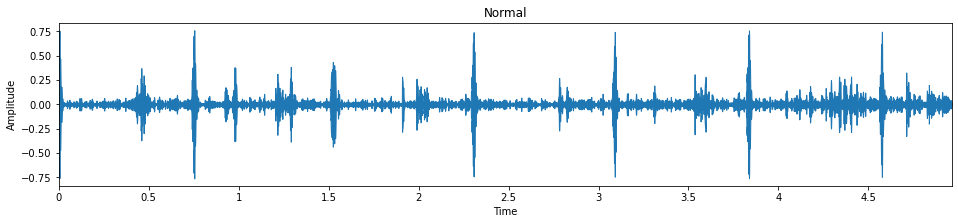

In [ ]:
sound_sample, sample_rate = sampleCategory(normal_file, "Normal")

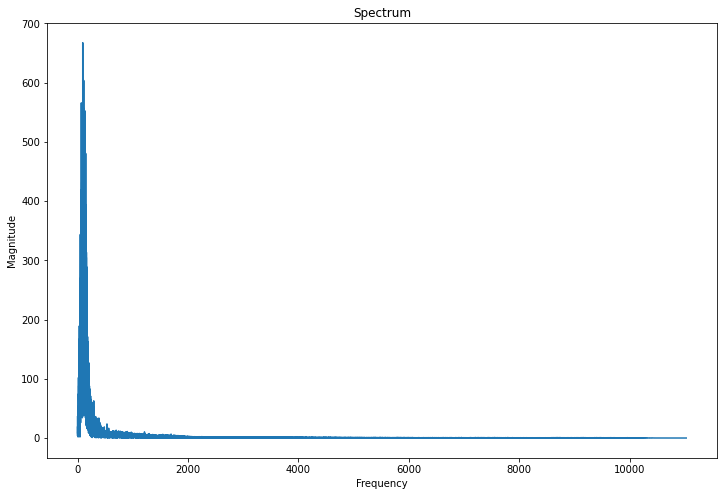

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


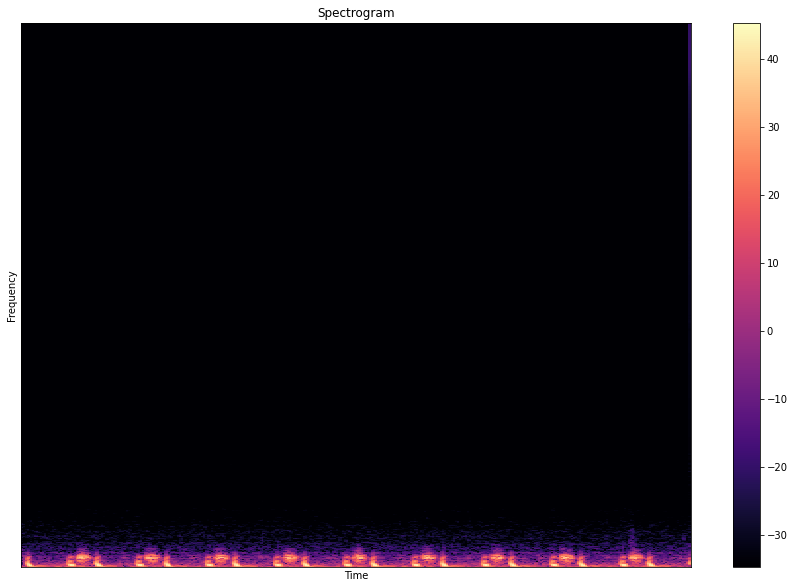

In [ ]:
spectogramAnalysis(sound_sample)

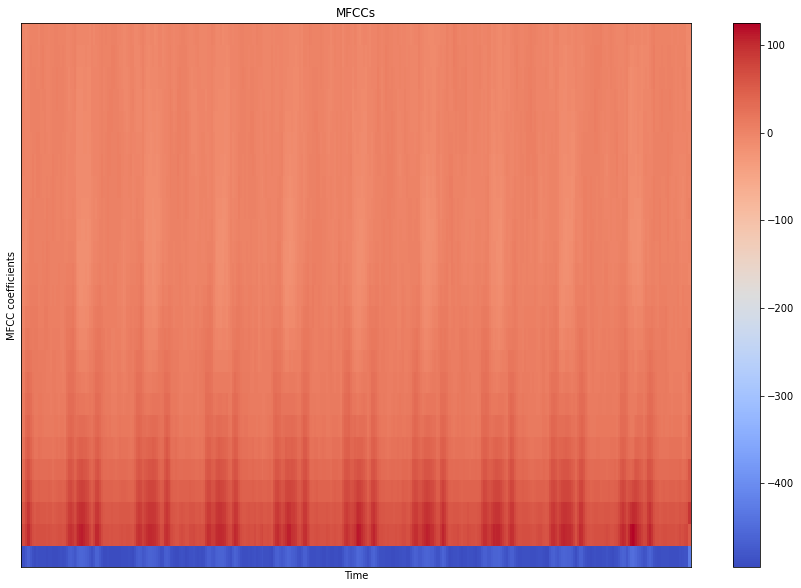

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Murmur

Heart murmurs are sounds — such as whooshing or swishing — made by rapid, choppy (turbulent) blood flow through the heart. The sounds can be heard with a device called a stethoscope.

In [ ]:
murmur_file = INPUT + "/set_a/murmur__201108222231.wav"

In [ ]:
ipd.Audio(murmur_file) 

duration: 7.935555555555555
(174979,) 22050


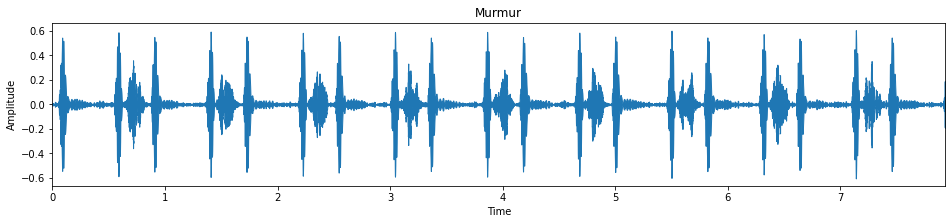

In [ ]:
sound_sample, sample_rate = sampleCategory(murmur_file, "Murmur")

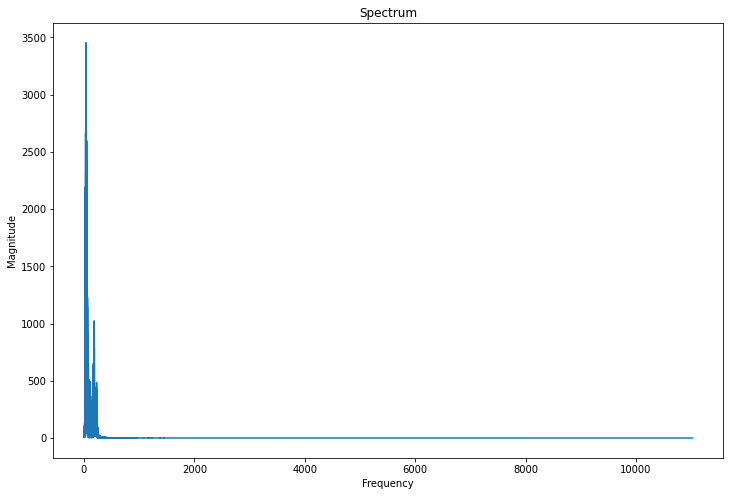

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


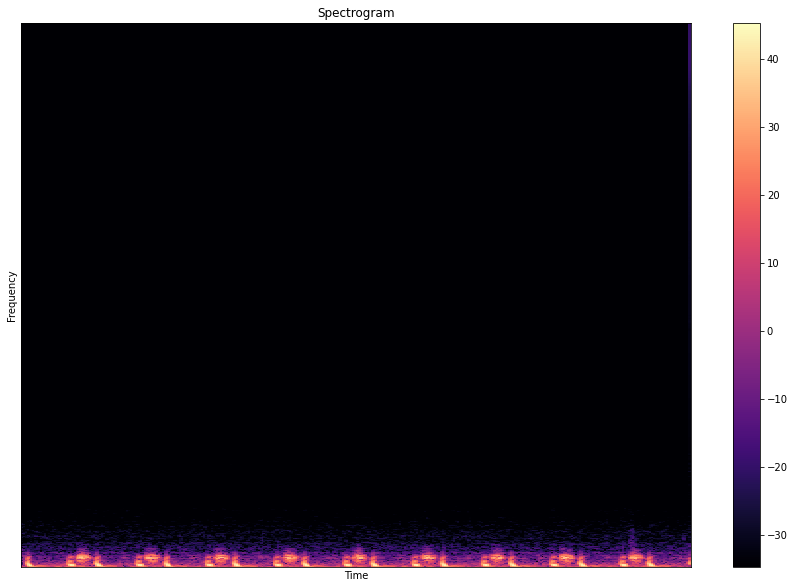

In [ ]:
spectogramAnalysis(sound_sample)

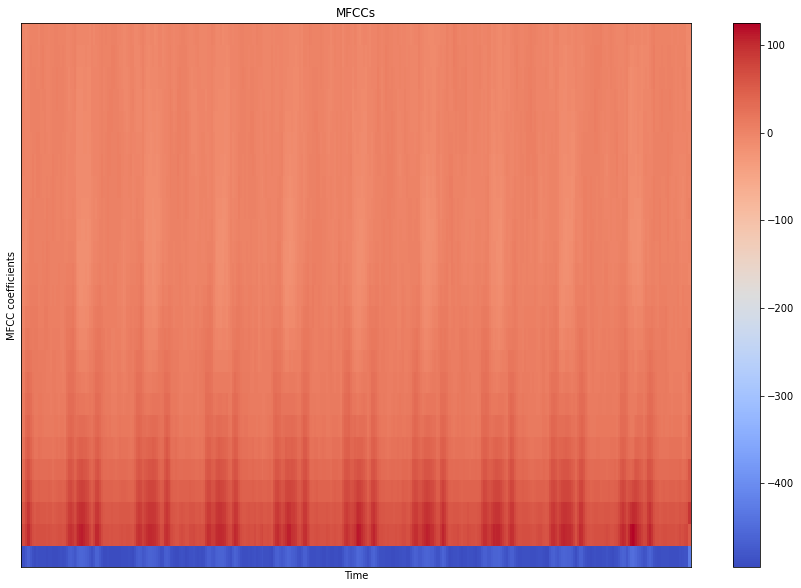

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Extrasystole

The extrasystole is the HS that is produced by performing an extra beat in each heart cycle or a skipped beat, unlike the heartbeat normal cycle.

In [ ]:
extrastole_file = INPUT + "/set_b/extrastole__127_1306764300147_C2.wav"

In [ ]:
ipd.Audio(extrastole_file) 

duration: 4.676009070294785
(103106,) 22050


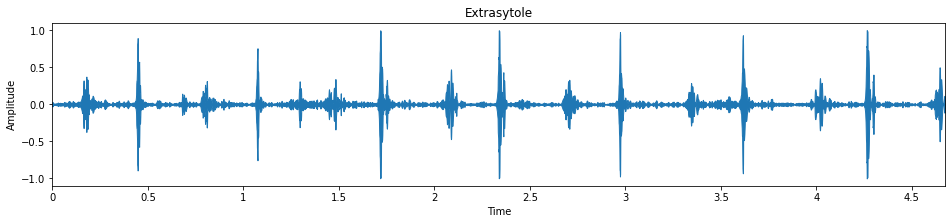

In [ ]:
sound_sample, sample_rate = sampleCategory(extrastole_file, "Extrasytole")

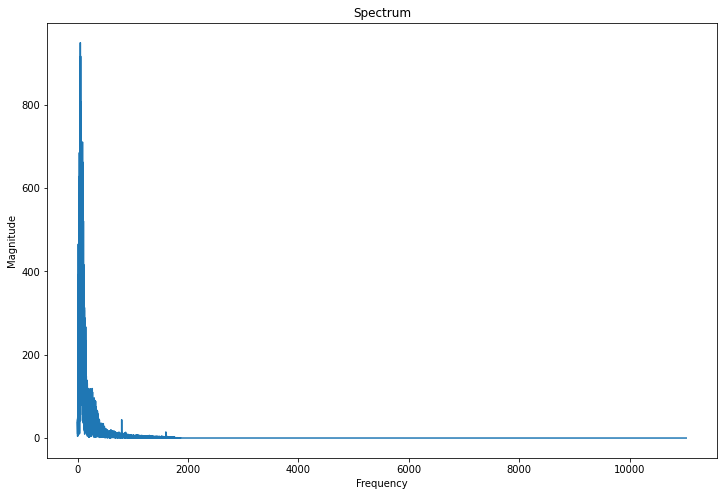

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


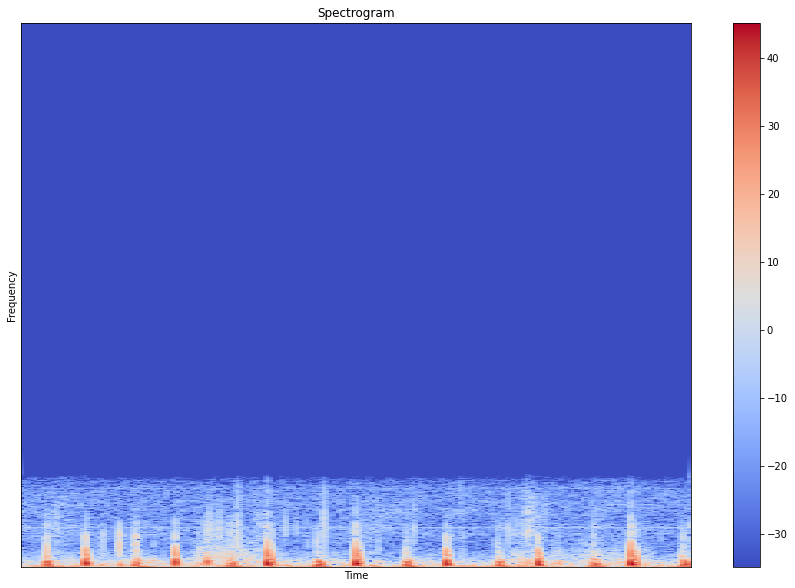

In [ ]:
spectogramAnalysis(sound_sample)

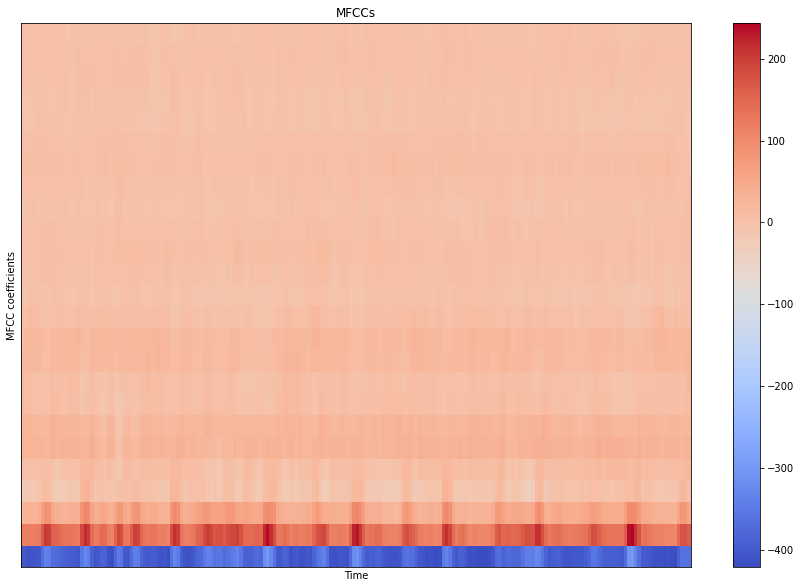

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Artifact

This includes a wide range of sounds that could not be identified as heart sounds that may indicate that try and collect data again

In [ ]:
artifact_file=INPUT + "/set_a/artifact__201012172012.wav"

In [ ]:
ipd.Audio(artifact_file) 

duration: 9.0
(198450,) 22050


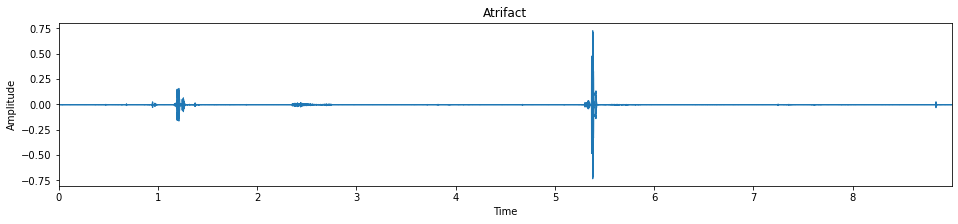

In [ ]:
sound_sample, sample_rate = sampleCategory(artifact_file, "Atrifact")

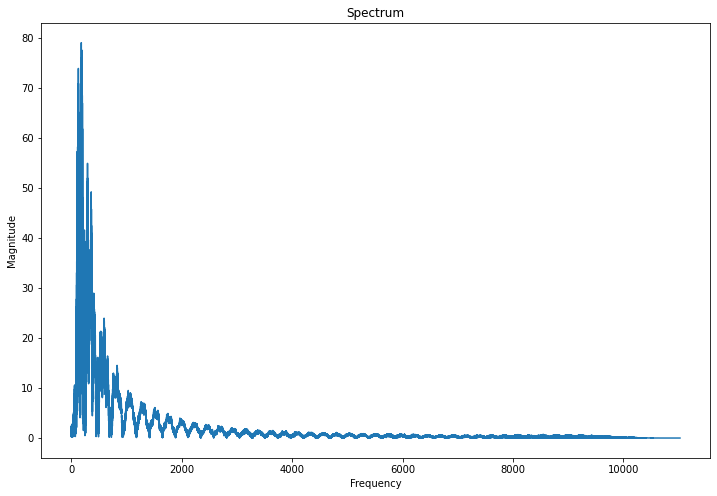

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


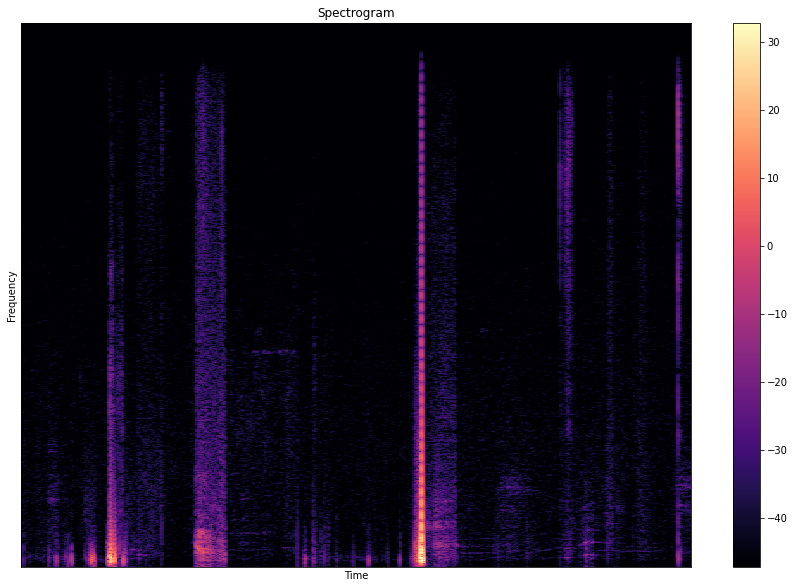

In [ ]:
spectogramAnalysis(sound_sample)

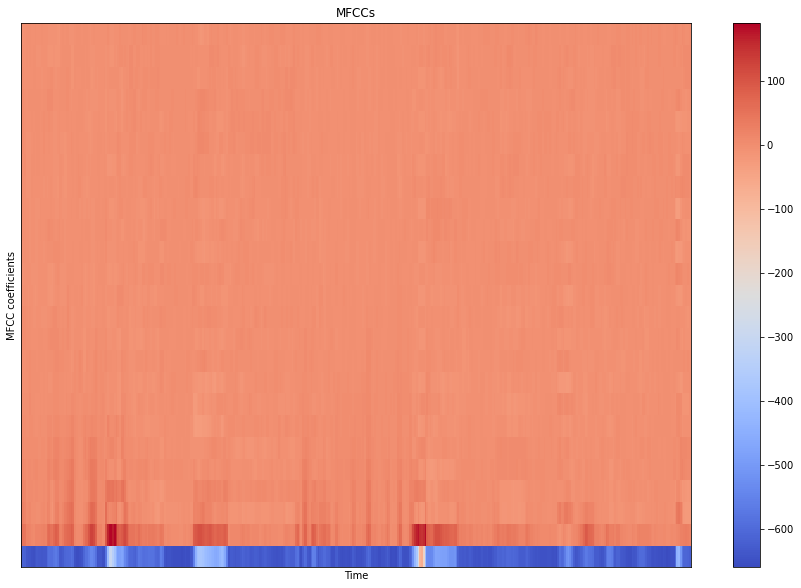

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Extra Heart Sound

May include an extra sound

In [ ]:
extrahls_file=INPUT + "/set_a/extrahls__201101070953.wav"

In [ ]:
ipd.Audio(extrahls_file) 

duration: 8.88408163265306
(195894,) 22050


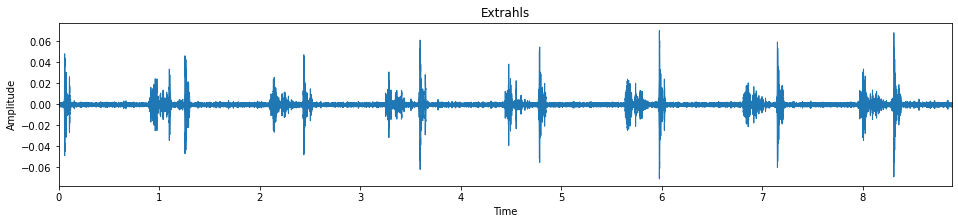

In [ ]:
sound_sample, sample_rate = sampleCategory(extrahls_file, "Extrahls")

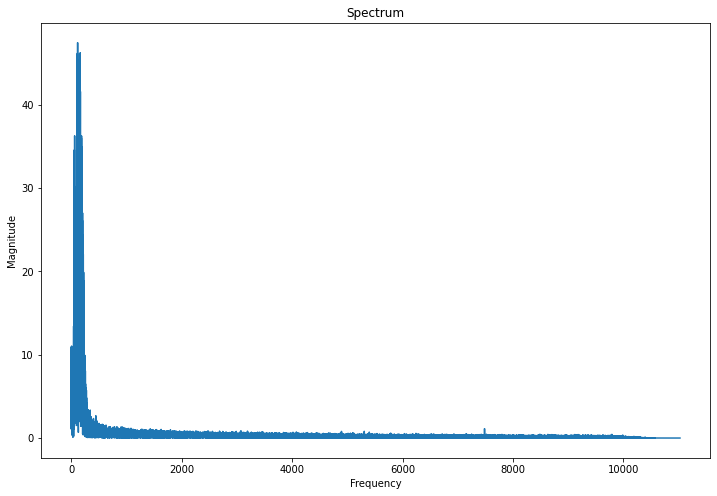

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


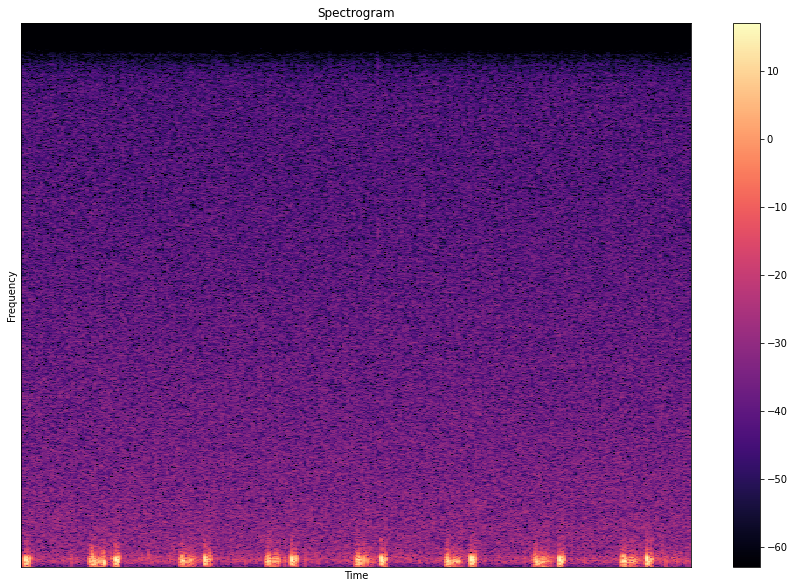

In [ ]:
spectogramAnalysis(sound_sample)

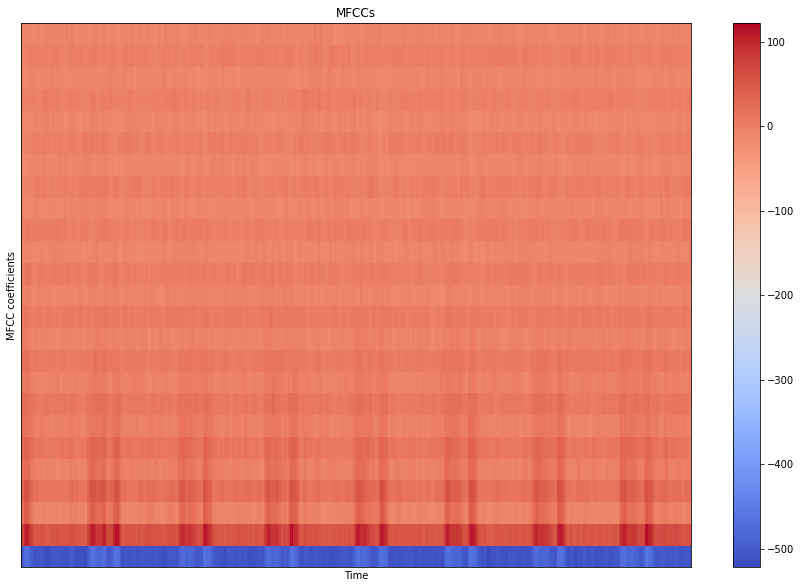

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

## Loading Data

In [ ]:
def load_file_data (folder, file_names, duration=12, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

### Encoding

In [ ]:
# Encodeing the five types: 'artifact','murmur','normal'
# ('extrastole','extrahls') are murmurs

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)

int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [ ]:
A_folder=INPUT+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201106010602.wav
fixing audio length : artifact__201106010602.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201106030612.wav
fixing audio length : artifact__201106030612.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201105040918.wav
fixing audio length : artifact__201105040918.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201105060108.wav
fixing audio length : artifact__201105060108.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201106040722.wav
fixing audio length : artifact__201106040722.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_a/artifact__201105041959.wav
fixing audio length : artifact__201105041959.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_

In [ ]:
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal_noisynormal_108_1305654420093_B.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__194_1308139824187_A1.wav
fixing audio length : normal__194_1308139824187_A1.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__209_1308162216750_A1.wav
fixing audio length : normal__209_1308162216750_A1.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__126_1306777102824_C.wav
fixing audio length : normal__126_1306777102824_C.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__153_1306848820671_B.wav
fixing audio length : normal__153_1306848820671_B.wav
load file  /content/drive/MyDrive/Pattern Recognition/Heartbeat Sounds//set_b/normal__216_1308245839516_C.wav
fixing audio length : normal__216_1308245839516_C.wav
load file  /content/drive/MyDrive/Pattern Recognition/H

### Conctaneation

In [ ]:
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


### Splitting

In [ ]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, random_state=42, shuffle=True)

# One-Shot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [ ]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)

print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)

print ("")
print ("trainAggregationMethoding data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4680

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

trainAggregationMethoding data shape:  (409, 40, 1)
training label shape:  (409, 3)

validation data shape:  (88, 40, 1)
validation label shape:  (88, 3)

test data shape:  (88, 40, 1)
test label shape:  (88, 3)
